# Weight Initialization

## Imports

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from baseSetterHelper import setAllSeeds, setDeterministic, computeAccu
from trainerHelper import modelTrainer
from plottingHelper import plotTrainingLoss, plotAccuracy, show_examples
from dataLoaderHelper import getDataLoadersMNIST

## Setting Parameters

In [5]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
setAllSeeds(RANDOM_SEED)
setDeterministic()

## Data Imports and Loader

In [7]:
trainLoader, validLoader, testLoader = getDataLoadersMNIST(
    batchSize=BATCH_SIZE,
    validFraction=0.1)

# Checking the dataset
for images, labels in trainLoader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

100%|██████████| 9912422/9912422 [00:00<00:00, 136846837.01it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 17951347.63it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40981845.85it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

100%|██████████| 4542/4542 [00:00<00:00, 15757261.18it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


##  Class Making

In [8]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, numFeatures, numClasses, dropProba, numHidden1, numHidden2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(numFeatures, numHidden1, bias=False),
            torch.nn.BatchNorm1d(numHidden1),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # 2nd hidden layer
            torch.nn.Linear(numHidden1, numHidden2, bias=False),
            torch.nn.BatchNorm1d(numHidden2),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # output layer
            torch.nn.Linear(numHidden2, numClasses)
        )

        for modu in self.modules():
          if (isinstance(modu,torch.nn.Linear)):
            modu.weight.detach().normal_(0,0.001)
            if (modu.bias is not None):
              modu.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits

## Without Dropout/ Drop Prob =0

In [9]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.0,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [10]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3027
Epoch:001/050 | Batch:050/210 |  Cost:0.6020
Epoch:001/050 | Batch:100/210 |  Cost:0.2182
Epoch:001/050 | Batch:150/210 |  Cost:0.1909
Epoch:001/050 | Batch:200/210 |  Cost:0.1895
Epoch:001/050 |
Train Acc 96.4732%
Val Acc   96.5833%
Time Taken: 0.27 min
Epoch:002/050 | Batch:000/210 |  Cost:0.1249
Epoch:002/050 | Batch:050/210 |  Cost:0.1190
Epoch:002/050 | Batch:100/210 |  Cost:0.1487
Epoch:002/050 | Batch:150/210 |  Cost:0.1231
Epoch:002/050 | Batch:200/210 |  Cost:0.1112
Epoch:002/050 |
Train Acc 97.5428%
Val Acc   97.4333%
Time Taken: 0.55 min
Epoch:003/050 | Batch:000/210 |  Cost:0.1319
Epoch:003/050 | Batch:050/210 |  Cost:0.0694
Epoch:003/050 | Batch:100/210 |  Cost:0.0776
Epoch:003/050 | Batch:150/210 |  Cost:0.0787
Epoch:003/050 | Batch:200/210 |  Cost:0.0606
Epoch:003/050 |
Train Acc 98.5249%
Val Acc   97.7167%
Time Taken: 0.82 min
Epoch:004/050 | Batch:000/210 |  Cost:0.0390
Epoch:004/050 | Batch:050/210 |  Cost:0.0492
Epoch:004/

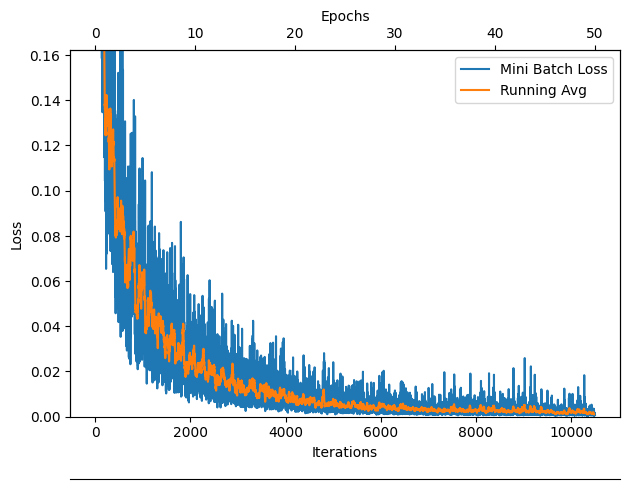

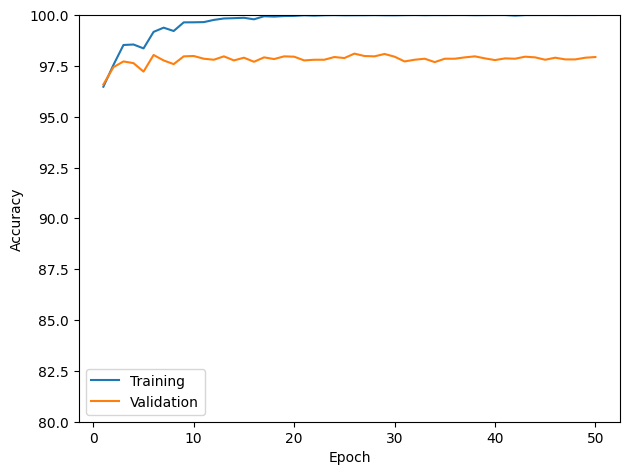

In [11]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With Dropout as 0.5

In [12]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.5,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [13]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3022
Epoch:001/050 | Batch:050/210 |  Cost:1.1388
Epoch:001/050 | Batch:100/210 |  Cost:0.8404
Epoch:001/050 | Batch:150/210 |  Cost:0.6681
Epoch:001/050 | Batch:200/210 |  Cost:0.7257
Epoch:001/050 |
Train Acc 91.4528%
Val Acc   93.0000%
Time Taken: 0.28 min
Epoch:002/050 | Batch:000/210 |  Cost:0.7628
Epoch:002/050 | Batch:050/210 |  Cost:0.6142
Epoch:002/050 | Batch:100/210 |  Cost:0.4620
Epoch:002/050 | Batch:150/210 |  Cost:0.5935
Epoch:002/050 | Batch:200/210 |  Cost:0.5706
Epoch:002/050 |
Train Acc 92.7344%
Val Acc   94.2333%
Time Taken: 0.55 min
Epoch:003/050 | Batch:000/210 |  Cost:0.4991
Epoch:003/050 | Batch:050/210 |  Cost:0.5398
Epoch:003/050 | Batch:100/210 |  Cost:0.5332
Epoch:003/050 | Batch:150/210 |  Cost:0.4698
Epoch:003/050 | Batch:200/210 |  Cost:0.4458
Epoch:003/050 |
Train Acc 93.8300%
Val Acc   94.9000%
Time Taken: 0.82 min
Epoch:004/050 | Batch:000/210 |  Cost:0.5532
Epoch:004/050 | Batch:050/210 |  Cost:0.4927
Epoch:004/

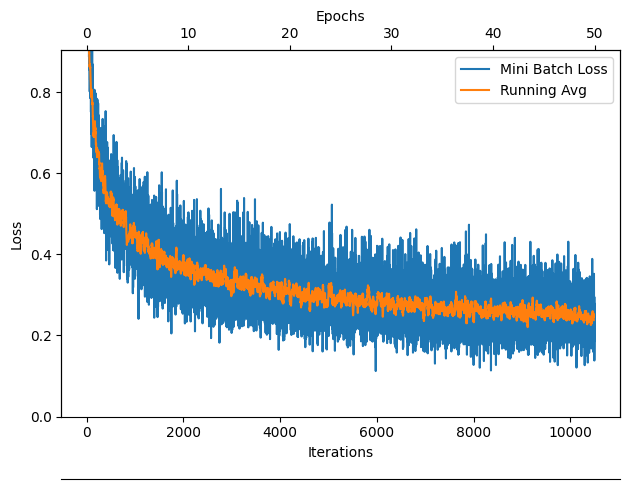

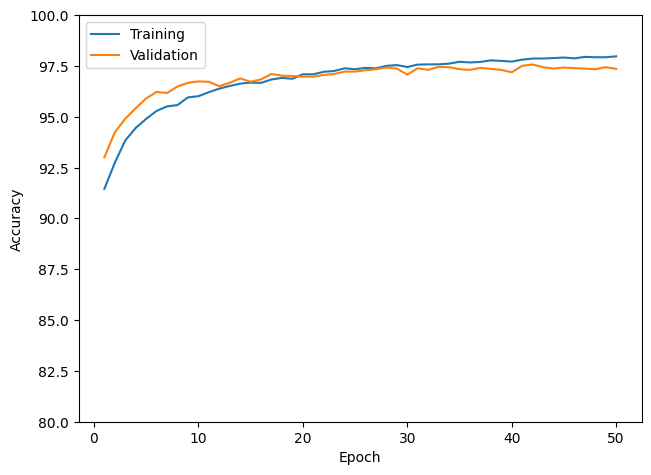

In [14]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With Dropout as 0.1

In [15]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.1,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [16]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3028
Epoch:001/050 | Batch:050/210 |  Cost:0.7044
Epoch:001/050 | Batch:100/210 |  Cost:0.3042
Epoch:001/050 | Batch:150/210 |  Cost:0.2724
Epoch:001/050 | Batch:200/210 |  Cost:0.2633
Epoch:001/050 |
Train Acc 95.6306%
Val Acc   96.2333%
Time Taken: 0.27 min
Epoch:002/050 | Batch:000/210 |  Cost:0.2040
Epoch:002/050 | Batch:050/210 |  Cost:0.2167
Epoch:002/050 | Batch:100/210 |  Cost:0.1515
Epoch:002/050 | Batch:150/210 |  Cost:0.1430
Epoch:002/050 | Batch:200/210 |  Cost:0.2186
Epoch:002/050 |
Train Acc 97.3326%
Val Acc   97.5667%
Time Taken: 0.55 min
Epoch:003/050 | Batch:000/210 |  Cost:0.1345
Epoch:003/050 | Batch:050/210 |  Cost:0.1668
Epoch:003/050 | Batch:100/210 |  Cost:0.1618
Epoch:003/050 | Batch:150/210 |  Cost:0.1249
Epoch:003/050 | Batch:200/210 |  Cost:0.0885
Epoch:003/050 |
Train Acc 97.6209%
Val Acc   97.5833%
Time Taken: 0.82 min
Epoch:004/050 | Batch:000/210 |  Cost:0.1783
Epoch:004/050 | Batch:050/210 |  Cost:0.1418
Epoch:004/

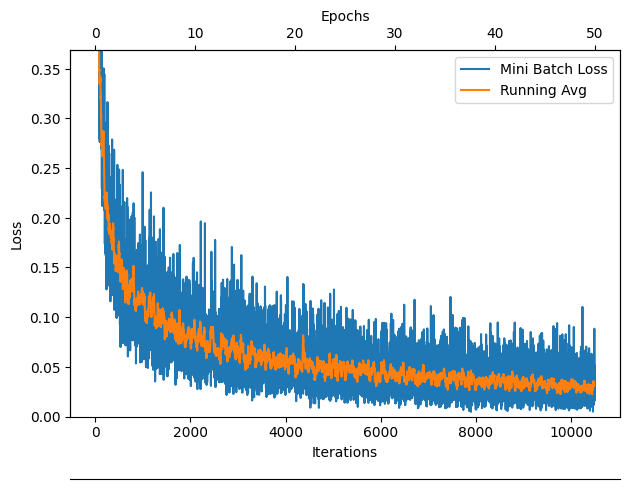

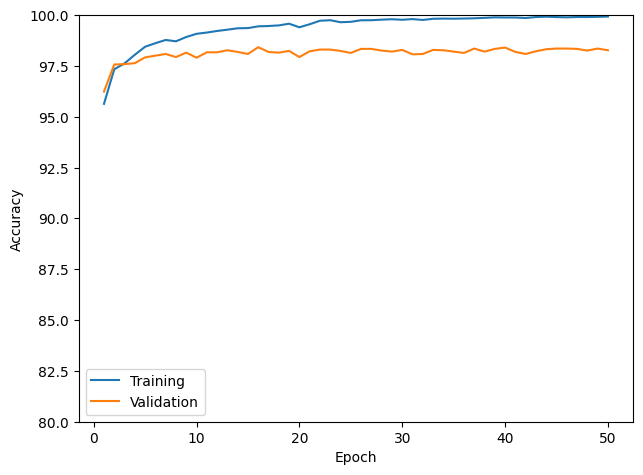

In [17]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()